https://www.kaggle.com/datasets/muhammadtalhaawan/ai-5000-tools-2023

https://www.kaggle.com/datasets/yasirabdaali/740-ai-tools-for-everyone

# 1st step- Webscraping AI tools from synthesia

In [1]:
import requests

# Define the URL
url = "https://www.synthesia.io/post/ai-tools#strong152-best-artificial-intelligence-tools-of-2023strong"

# Send a GET request to the URL
response = requests.get(url)

# Check the HTTP status code
if response.status_code == 200:
    print("Request successful! Proceed to the next steps.")
else:
    print(f"Request failed with status code: {response.status_code}")


Request successful! Proceed to the next steps.


In [2]:
from bs4 import BeautifulSoup
import requests

# URL of the website
url = 'https://www.synthesia.io/post/ai-tools#strong152-best-artificial-intelligence-tools-of-2023strong'

# Send an HTTP GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the <h3> tags and their corresponding <p> tags
    h3_tags = soup.find_all('h3')

    # Create a file to save the scraped data
    with open('scraped_data.txt', 'w', encoding='utf-8') as file:
        # Iterate through all items and extract titles and descriptions
        for i, h3 in enumerate(h3_tags, start=1):
            p = h3.find_next('p')
            title = h3.text.strip()
            description = p.text.strip()
            output = f"Item {i} - Title: {title}\nItem {i} - Description: {description}\n\n"
            print(output)
            file.write(output)

    print("Scraped data saved to scraped_data.txt")
else:
    print(f"Request failed with status code {response.status_code}")


Item 1 - Title: Easily scale your video production in 120+Â languages.
Item 1 - Description: Can you imagine driving to an unknown destination before navigation apps existed? I, for one, can't.Â


Item 2 - Title: 1. Synthesia
Item 2 - Description: Synthesia is the absolute pioneer in AI video generation. Using their intuitive online platform, you can create videos with human presenters by simply typing in text. You can choose between 125+ AI avatars (based on real actors) who can speak your words in 120+ languages. You can make a free demo and then upgrade to a personal ($30/month) or corporate plan (custom price).


Item 3 - Title: 2. Runway
Item 3 - Description: Video editing used to be a tedious and lengthy process. But it no longer requires technical skills or expensive software. Runway makes it super easy to edit and enhance your existing video footage: remove background, paint out objects, add subtitles, and more. You can create 3 projects for free, while the most popular plan co

AttributeError: 'NoneType' object has no attribute 'text'

In [3]:
import re
import pandas as pd

# Read the content of the scraped_data.txt file
with open('scraped_data.txt', 'r', encoding='utf-8') as file:
    data = file.read()

# Define a regular expression pattern to match titles and descriptions
pattern = r'Item \d+ - Title: (.*?)\nItem \d+ - Description: (.*?)\n\n'

# Use regex to find and extract titles and descriptions
matches = re.findall(pattern, data, re.DOTALL)

# Create a list of dictionaries where each dictionary represents an item
items = [{'Title': match[0], 'Description': match[1]} for match in matches]

# Create a pandas DataFrame from the list of items
df = pd.DataFrame(items)

# Save the DataFrame to a CSV file
df.to_csv('items.csv', index=False)




In [4]:
df

,Title,Description
0,Easily scale your video production in 120+Â la...,Can you imagine driving to an unknown destinat...
1,1. Synthesia,Synthesia is the absolute pioneer in AI video ...
2,2. Runway,Video editing used to be a tedious and lengthy...
3,3. Unscreen,Unscreen helps you remove background from your...
4,4. VREW,VREW uses AI to generate captions from speech ...
...,...,...
154,How many types of AI tools are there?,"In general, there are 2 types of AI tools: ana..."
155,,Synthesia is the #1 AI Video Creation Platform...
156,,Synthesia is the #1 AI Video Creation Platform...
157,,Synthesia is the #1 AI Video Creation Platform...


In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('items.csv')

# Display the first 10 rows
df.head(10)




,Title,Description
0,Easily scale your video production in 120+Â la...,Can you imagine driving to an unknown destinat...
1,1. Synthesia,Synthesia is the absolute pioneer in AI video ...
2,2. Runway,Video editing used to be a tedious and lengthy...
3,3. Unscreen,Unscreen helps you remove background from your...
4,4. VREW,VREW uses AI to generate captions from speech ...
5,5. Descript,Descript is a comprehensive AI video editor th...
6,6. Nova A.I.,Nova A.I. is a video categorization and organi...
7,7. Reface: Face Swap Videos,The Face Swap mobile app is a fun and easy way...
8,8. Topaz Video AI,If you have existing video footage and want to...
9,9. Make-a-Video,Make-a-Video is Metaâs latest AI system that...


In [6]:
# Display the last 10 rows
df.tail(10)

,Title,Description
149,149. This Cat Does Not Exist,Did you know that the love for cats has its ow...
150,150. Dog Scanner App,This is a must-try app for all dog lovers. Use...
151,151. Supreme.ai,Sometimes itâs hard to get the right idea or...
152,152. AIÂ Top Tools,"It's called AI Top Tools, and its AI technolog..."
153,What is the best AI tool?,"Sorry if this answer is disappointing, but it ..."
154,How many types of AI tools are there?,"In general, there are 2 types of AI tools: ana..."
155,NaN,Synthesia is the #1 AI Video Creation Platform...
156,NaN,Synthesia is the #1 AI Video Creation Platform...
157,NaN,Synthesia is the #1 AI Video Creation Platform...
158,Create your first AI video today!,Synthesia is the #1 AI Video Creation Platform...


In [7]:
# Delete the first row (index 0) and the last 7 rows since those rows dont have apps/tools
df = df.iloc[1:-7]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the modified DataFrame back to the same CSV file
df.to_csv('items.csv', index=False)

In [8]:
df

,Title,Description
0,1. Synthesia,Synthesia is the absolute pioneer in AI video ...
1,2. Runway,Video editing used to be a tedious and lengthy...
2,3. Unscreen,Unscreen helps you remove background from your...
3,4. VREW,VREW uses AI to generate captions from speech ...
4,5. Descript,Descript is a comprehensive AI video editor th...
...,...,...
146,147. PlayPhrase.me,A perfect AI tool for cinephiles. Enter a quot...
147,148. Yarn,"Type in a word or phrase from a TV show, movie..."
148,149. This Cat Does Not Exist,Did you know that the love for cats has its ow...
149,150. Dog Scanner App,This is a must-try app for all dog lovers. Use...


In [9]:

# Remove numbers and dots from the "Title" column
df['Title'] = df['Title'].str.replace(r'^\d+\.\s*', '', regex=True)

# Save the modified DataFrame back to the same CSV file
df.to_csv('items.csv', index=False)


In [10]:
df

,Title,Description
0,Synthesia,Synthesia is the absolute pioneer in AI video ...
1,Runway,Video editing used to be a tedious and lengthy...
2,Unscreen,Unscreen helps you remove background from your...
3,VREW,VREW uses AI to generate captions from speech ...
4,Descript,Descript is a comprehensive AI video editor th...
...,...,...
146,PlayPhrase.me,A perfect AI tool for cinephiles. Enter a quot...
147,Yarn,"Type in a word or phrase from a TV show, movie..."
148,This Cat Does Not Exist,Did you know that the love for cats has its ow...
149,Dog Scanner App,This is a must-try app for all dog lovers. Use...


In [11]:
# Clean all columns in the DataFrame
for col in df.columns:
    df[col] = df[col].apply(lambda x: ''.join([char if ord(char) < 128 else ' ' for char in str(x)]))

# Now, df contains the cleaned data with non-ASCII characters replaced by spaces

In [12]:
df

,Title,Description
0,Synthesia,Synthesia is the absolute pioneer in AI video ...
1,Runway,Video editing used to be a tedious and lengthy...
2,Unscreen,Unscreen helps you remove background from your...
3,VREW,VREW uses AI to generate captions from speech ...
4,Descript,Descript is a comprehensive AI video editor th...
...,...,...
146,PlayPhrase.me,A perfect AI tool for cinephiles. Enter a quot...
147,Yarn,"Type in a word or phrase from a TV show, movie..."
148,This Cat Does Not Exist,Did you know that the love for cats has its ow...
149,Dog Scanner App,This is a must-try app for all dog lovers. Use...


In [13]:
# Save the DataFrame to a new CSV file in the same path
df.to_csv('cleaned_items.csv', index=False)


In [14]:
df

,Title,Description
0,Synthesia,Synthesia is the absolute pioneer in AI video ...
1,Runway,Video editing used to be a tedious and lengthy...
2,Unscreen,Unscreen helps you remove background from your...
3,VREW,VREW uses AI to generate captions from speech ...
4,Descript,Descript is a comprehensive AI video editor th...
...,...,...
146,PlayPhrase.me,A perfect AI tool for cinephiles. Enter a quot...
147,Yarn,"Type in a word or phrase from a TV show, movie..."
148,This Cat Does Not Exist,Did you know that the love for cats has its ow...
149,Dog Scanner App,This is a must-try app for all dog lovers. Use...


In [15]:
# Save the DataFrame to a new CSV file in the same directory
df.to_csv('cleaned_items.csv', index=False)


In [16]:
df.isna().sum()

Title          0
Description    0
dtype: int64

# Loading ai tools datasets from 
https://www.kaggle.com/datasets/muhammadtalhaawan/ai-5000-tools-2023

https://www.kaggle.com/datasets/yasirabdaali/740-ai-tools-for-everyone

# 5000 tools columns 
Data Fields:

AI Tool Name: The name of the AI tool or software.

Description: A brief description of the tool's features and capabilities.

Free/Paid/Other: Indicates whether the tool is available for free, has a paid subscription model, or falls under another pricing category.

Useable For: Describes the primary use cases or applications for which the AI tool is suitable.

Charges: Specifies the cost or pricing structure associated with the tool (if applicable).

Review: User-generated reviews and ratings to provide insights into the tool's performance and user satisfaction.

Tool Link: URL or link to access the AI tool's official website or download page.

Major Category: Categorizes the AI tools into broader domains or categories, such as natural language processing (NLP), computer vision, data analytics, and more.

In [17]:
import pandas as pd

In [18]:
biggestdf = pd.read_csv('all_ai_tool.csv')

In [19]:
biggestdf

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,https://10web.io/?utm_source=futurepedia&utm_m...,code
...,...,...,...,...,...,...,...,...
4964,Zoom Iq,Capture meaningful and actionable insights fro...,Contact for Pricing,/ summarizer / email assistant,NaN,2,https://blog.zoom.us/zoom-iq-smart-companion/?...,text
4965,Zoomscape Ai,ZoomScape AI is an AI-powered tool that enable...,Free Trial,/ presentations,$5,NaN,https://zoomscape.ai/?utm_source=futurepedia&u...,business
4966,Zust Qr,Enables users to craft artistic QR codes by in...,Free,/ image generator,NaN,NaN,https://qr.zust.ai/?utm_source=futurepedia&utm...,image
4967,Zuva,Contract analysis and insight generation.,Free Trial,/ legal assistant,$ 50/mo,1,https://zuva.ai/widget/try-it/?utm_source=futu...,business


# 1000 tools columns
tool_image_url: This column contains the URL of an image that represents the AI tool.

tool: This column contains the name of the AI tool.

tool_description: This column contains a description of the AI tool, including its features, capabilities, and use cases.

category: This column contains the category or categories that the AI tool falls under, such as code generation, image to text and natural language to code, etc.

upvotes: This column contains the number of upvotes or positive ratings that the AI tool has received from users.

tags: This column contains keywords or tags that are associated with the AI tool, such as the industries or applications it is best suited for, the technologies it uses, etc.


In [20]:
smalldf = pd.read_csv('aitools.csv')

In [21]:
smalldf


,tool_mage_url,tool,tool_description,category,upvotes,tags
0,https://uploads-ssl.webflow.com/63994dae103371...,Codeium,"Helps developers understand, modify, and test ...",Generative Code,1987,NaN
1,https://uploads-ssl.webflow.com/63994dae103371...,LeiaPix,Upload an image and turn it into a 3D animation,Image Improvement,1779,Generative Video
2,https://uploads-ssl.webflow.com/63994dae103371...,GPT-3 Playground (OpenAI),Free AI writing tool - Let the AI generate any...,Copywriting,1433,Research
3,https://uploads-ssl.webflow.com/63994dae103371...,BlueWillow,AI-powered image generating tool in Discord,Generative Art,1230,Matt's Picks
4,https://uploads-ssl.webflow.com/63994dae103371...,Character.AI,Have chat conversations with AI characters,Chat,954,For Fun
...,...,...,...,...,...,...
1007,https://uploads-ssl.webflow.com/63994dae103371...,Shortwave,A platform for emails productivity.,Productivity,1,NaN
1008,https://uploads-ssl.webflow.com/63994dae103371...,Adstra,Find and read only the articles that will solv...,Productivity,0,Research
1009,https://uploads-ssl.webflow.com/63994dae103371...,Mental Models,50 mental models to help users better understa...,Self-Improvement,0,NaN
1010,https://uploads-ssl.webflow.com/63994dae103371...,AI Listing Architect,Creates SEO-friendly and optimized Amazon list...,Copywriting,0,NaN


# future tools( 550 future tools added to the previous df)


In [23]:
futuredf = pd.read_csv('futuretools.csv')

In [24]:
futuredf

,tool_mage_url,tool,tool_description,category,upvotes,tags
0,https://global-uploads.webflow.com/63994dae103...,Inbox Narrator,An app for email summaries delivered by a voic...,Productivity,1,NaN
1,https://global-uploads.webflow.com/63994dae103...,ChatTube,A Google Chrome Extension to chat with any you...,Chat,5,NaN
2,https://global-uploads.webflow.com/63994dae103...,Bito,A tool to generate custom designs for any proj...,Generative Art,3,NaN
3,https://global-uploads.webflow.com/63994dae103...,Bagasura,"A platform for bug tracking, streamlining work...",Productivity,2,NaN
4,https://global-uploads.webflow.com/63994dae103...,CometCore AI,A chat platform for automating tasks and creat...,Chat,10,NaN
...,...,...,...,...,...,...
1564,https://global-uploads.webflow.com/63994dae103...,Prisma,Upload photos and convert them into paintings,Avatar,19,Generative Art
1565,https://global-uploads.webflow.com/63994dae103...,Replicate,Plug in an image and it will attempt to give y...,Generative Art,180,Image Scanning
1566,https://global-uploads.webflow.com/63994dae103...,AI Image Upscaler,Use AI to upscale small or pixelated images,Image Improvement,263,Matt's Picks
1567,https://global-uploads.webflow.com/63994dae103...,ClipDrop,"Upscale images, remove backgrounds, remove unw...",Image Improvement,33,Matt's Picks


# renaming columns so all datasets have same columns

In [25]:
cleaned_items_df = pd.read_csv('cleaned_items.csv')

In [26]:
cleaned_items_df

,Title,Description
0,Synthesia,Synthesia is the absolute pioneer in AI video ...
1,Runway,Video editing used to be a tedious and lengthy...
2,Unscreen,Unscreen helps you remove background from your...
3,VREW,VREW uses AI to generate captions from speech ...
4,Descript,Descript is a comprehensive AI video editor th...
...,...,...
146,PlayPhrase.me,A perfect AI tool for cinephiles. Enter a quot...
147,Yarn,"Type in a word or phrase from a TV show, movie..."
148,This Cat Does Not Exist,Did you know that the love for cats has its ow...
149,Dog Scanner App,This is a must-try app for all dog lovers. Use...


In [27]:
# Rename columns in each dataframe
#tool_mage_url	tool	tool_description	category	upvotes	tags
futuredf.rename(columns={
    'tool': 'tool_name',

}, inplace=True)

#tool_mage_url	tool	tool_description	category	upvotes	tags
smalldf.rename(columns={
    'tool': 'tool_name',

}, inplace=True)
#	AI Tool Name	Description	Free/Paid/Other	Useable For	Charges	Review	Tool Link	Major Category
biggestdf.rename(columns={
    'tool': 'tool_name',
    'Description': 'tool_description',
    'Charges': 'price',
    'Major Category': 'category'
}, inplace=True)
# Title	Description
cleaned_items_df.rename(columns={
    'Title': 'tool_name',
    'Description': 'tool_description',
}, inplace=True)


In [28]:
futuredf

,tool_mage_url,tool_name,tool_description,category,upvotes,tags
0,https://global-uploads.webflow.com/63994dae103...,Inbox Narrator,An app for email summaries delivered by a voic...,Productivity,1,NaN
1,https://global-uploads.webflow.com/63994dae103...,ChatTube,A Google Chrome Extension to chat with any you...,Chat,5,NaN
2,https://global-uploads.webflow.com/63994dae103...,Bito,A tool to generate custom designs for any proj...,Generative Art,3,NaN
3,https://global-uploads.webflow.com/63994dae103...,Bagasura,"A platform for bug tracking, streamlining work...",Productivity,2,NaN
4,https://global-uploads.webflow.com/63994dae103...,CometCore AI,A chat platform for automating tasks and creat...,Chat,10,NaN
...,...,...,...,...,...,...
1564,https://global-uploads.webflow.com/63994dae103...,Prisma,Upload photos and convert them into paintings,Avatar,19,Generative Art
1565,https://global-uploads.webflow.com/63994dae103...,Replicate,Plug in an image and it will attempt to give y...,Generative Art,180,Image Scanning
1566,https://global-uploads.webflow.com/63994dae103...,AI Image Upscaler,Use AI to upscale small or pixelated images,Image Improvement,263,Matt's Picks
1567,https://global-uploads.webflow.com/63994dae103...,ClipDrop,"Upscale images, remove backgrounds, remove unw...",Image Improvement,33,Matt's Picks


In [29]:
smalldf

,tool_mage_url,tool_name,tool_description,category,upvotes,tags
0,https://uploads-ssl.webflow.com/63994dae103371...,Codeium,"Helps developers understand, modify, and test ...",Generative Code,1987,NaN
1,https://uploads-ssl.webflow.com/63994dae103371...,LeiaPix,Upload an image and turn it into a 3D animation,Image Improvement,1779,Generative Video
2,https://uploads-ssl.webflow.com/63994dae103371...,GPT-3 Playground (OpenAI),Free AI writing tool - Let the AI generate any...,Copywriting,1433,Research
3,https://uploads-ssl.webflow.com/63994dae103371...,BlueWillow,AI-powered image generating tool in Discord,Generative Art,1230,Matt's Picks
4,https://uploads-ssl.webflow.com/63994dae103371...,Character.AI,Have chat conversations with AI characters,Chat,954,For Fun
...,...,...,...,...,...,...
1007,https://uploads-ssl.webflow.com/63994dae103371...,Shortwave,A platform for emails productivity.,Productivity,1,NaN
1008,https://uploads-ssl.webflow.com/63994dae103371...,Adstra,Find and read only the articles that will solv...,Productivity,0,Research
1009,https://uploads-ssl.webflow.com/63994dae103371...,Mental Models,50 mental models to help users better understa...,Self-Improvement,0,NaN
1010,https://uploads-ssl.webflow.com/63994dae103371...,AI Listing Architect,Creates SEO-friendly and optimized Amazon list...,Copywriting,0,NaN


In [30]:
biggestdf

,AI Tool Name,tool_description,Free/Paid/Other,Useable For,price,Review,Tool Link,category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,https://10web.io/?utm_source=futurepedia&utm_m...,code
...,...,...,...,...,...,...,...,...
4964,Zoom Iq,Capture meaningful and actionable insights fro...,Contact for Pricing,/ summarizer / email assistant,NaN,2,https://blog.zoom.us/zoom-iq-smart-companion/?...,text
4965,Zoomscape Ai,ZoomScape AI is an AI-powered tool that enable...,Free Trial,/ presentations,$5,NaN,https://zoomscape.ai/?utm_source=futurepedia&u...,business
4966,Zust Qr,Enables users to craft artistic QR codes by in...,Free,/ image generator,NaN,NaN,https://qr.zust.ai/?utm_source=futurepedia&utm...,image
4967,Zuva,Contract analysis and insight generation.,Free Trial,/ legal assistant,$ 50/mo,1,https://zuva.ai/widget/try-it/?utm_source=futu...,business


In [31]:
cleaned_items_df

,tool_name,tool_description
0,Synthesia,Synthesia is the absolute pioneer in AI video ...
1,Runway,Video editing used to be a tedious and lengthy...
2,Unscreen,Unscreen helps you remove background from your...
3,VREW,VREW uses AI to generate captions from speech ...
4,Descript,Descript is a comprehensive AI video editor th...
...,...,...
146,PlayPhrase.me,A perfect AI tool for cinephiles. Enter a quot...
147,Yarn,"Type in a word or phrase from a TV show, movie..."
148,This Cat Does Not Exist,Did you know that the love for cats has its ow...
149,Dog Scanner App,This is a must-try app for all dog lovers. Use...


In [32]:
# Data cleaning
# Check for missing values in each dataset
missing_values_futuredf = futuredf.isnull().sum()
missing_values_smalldf = smalldf.isnull().sum()
missing_values_biggestdf = biggestdf.isnull().sum()
missing_values_cleaned_items_df = cleaned_items_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in futuredf:")
print(missing_values_futuredf)

print("\nMissing Values in smalldf:")
print(missing_values_smalldf)

print("\nMissing Values in biggestdf:")
print(missing_values_biggestdf)

print("\nMissing Values in cleaned_items_df:")
print(missing_values_cleaned_items_df)


Missing Values in futuredf:
tool_mage_url          0
tool_name              0
tool_description       1
category               1
upvotes                0
tags                1178
dtype: int64

Missing Values in smalldf:
tool_mage_url         0
tool_name             0
tool_description      1
category              0
upvotes               0
tags                626
dtype: int64

Missing Values in biggestdf:
AI Tool Name           0
tool_description       0
Free/Paid/Other        0
Useable For            0
price               2435
Review              3507
Tool Link              0
category               0
dtype: int64

Missing Values in cleaned_items_df:
tool_name           0
tool_description    0
dtype: int64


In [33]:
# Tags are similar to category on smalldf and futuredf but i am not sure if they will be useless or not so i will just save them in a new df and then drop it from those dfs
# Create a new DataFrame for tags
tags_future_df = futuredf[['tool_name', 'tags']].copy()  # Copy the 'tool_name' and 'tags' columns

# Remove the 'tags' column from futuredf
futuredf.drop(columns=['tags'], inplace=True)

# Create a new DataFrame for tags
tags_smalldf = smalldf[['tool_name', 'tags']].copy()  # Copy the 'tool_name' and 'tags' columns

# Remove the 'tags' column from smalldf
smalldf.drop(columns=['tags'], inplace=True)


In [34]:
smalldf

,tool_mage_url,tool_name,tool_description,category,upvotes
0,https://uploads-ssl.webflow.com/63994dae103371...,Codeium,"Helps developers understand, modify, and test ...",Generative Code,1987
1,https://uploads-ssl.webflow.com/63994dae103371...,LeiaPix,Upload an image and turn it into a 3D animation,Image Improvement,1779
2,https://uploads-ssl.webflow.com/63994dae103371...,GPT-3 Playground (OpenAI),Free AI writing tool - Let the AI generate any...,Copywriting,1433
3,https://uploads-ssl.webflow.com/63994dae103371...,BlueWillow,AI-powered image generating tool in Discord,Generative Art,1230
4,https://uploads-ssl.webflow.com/63994dae103371...,Character.AI,Have chat conversations with AI characters,Chat,954
...,...,...,...,...,...
1007,https://uploads-ssl.webflow.com/63994dae103371...,Shortwave,A platform for emails productivity.,Productivity,1
1008,https://uploads-ssl.webflow.com/63994dae103371...,Adstra,Find and read only the articles that will solv...,Productivity,0
1009,https://uploads-ssl.webflow.com/63994dae103371...,Mental Models,50 mental models to help users better understa...,Self-Improvement,0
1010,https://uploads-ssl.webflow.com/63994dae103371...,AI Listing Architect,Creates SEO-friendly and optimized Amazon list...,Copywriting,0


In [35]:
#smalldf and futuredf have now only 1 nan on tool_description and futuredf has 1 nan on category, since its only 1 i will drop those.
# Drop rows with missing values in 'tool_description' and 'category' columns
futuredf.dropna(subset=['tool_description', 'category'], inplace=True)
# Drop rows with missing values in 'tool_description' column
smalldf.dropna(subset=['tool_description'], inplace=True)



In [36]:
# Data cleaning
# Check for missing values in each dataset
missing_values_futuredf = futuredf.isnull().sum()
missing_values_smalldf = smalldf.isnull().sum()
missing_values_biggestdf = biggestdf.isnull().sum()
missing_values_cleaned_items_df = cleaned_items_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in futuredf:")
print(missing_values_futuredf)

print("\nMissing Values in smalldf:")
print(missing_values_smalldf)

print("\nMissing Values in biggestdf:")
print(missing_values_biggestdf)

print("\nMissing Values in cleaned_items_df:")
print(missing_values_cleaned_items_df)


Missing Values in futuredf:
tool_mage_url       0
tool_name           0
tool_description    0
category            0
upvotes             0
dtype: int64

Missing Values in smalldf:
tool_mage_url       0
tool_name           0
tool_description    0
category            0
upvotes             0
dtype: int64

Missing Values in biggestdf:
AI Tool Name           0
tool_description       0
Free/Paid/Other        0
Useable For            0
price               2435
Review              3507
Tool Link              0
category               0
dtype: int64

Missing Values in cleaned_items_df:
tool_name           0
tool_description    0
dtype: int64


In [37]:
# I don't know what to do on biggestdf since i will need review column for my ai tool recomender and maybe price, but the df has half or more  of the values Nans
# I will leave this decision for later and ask Jan and Erin
# Update: so the reviews are just the number of reviews, so i can replace nans with 0s since i am assuming the nan values are for tools with 0 reviews. additionally it won't give me any usefull info for the ai tool recommender. it's better to just use the upvotes on smalldf for that.
# Update 2: the price columns with nans i am assuming they have several prices ( not a fixed price, since the 5 i looked 4 have different subscription plans or a taiolored payment) 


In [38]:
# Replace NaN values in the "review" column with 0
biggestdf['Review'].fillna(0, inplace=True)


In [39]:
# Data cleaning
# Check for missing values in each dataset
missing_values_futuredf = futuredf.isnull().sum()
missing_values_smalldf = smalldf.isnull().sum()
missing_values_biggestdf = biggestdf.isnull().sum()
missing_values_cleaned_items_df = cleaned_items_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in futuredf:")
print(missing_values_futuredf)

print("\nMissing Values in smalldf:")
print(missing_values_smalldf)

print("\nMissing Values in biggestdf:")
print(missing_values_biggestdf)

print("\nMissing Values in cleaned_items_df:")
print(missing_values_cleaned_items_df)


Missing Values in futuredf:
tool_mage_url       0
tool_name           0
tool_description    0
category            0
upvotes             0
dtype: int64

Missing Values in smalldf:
tool_mage_url       0
tool_name           0
tool_description    0
category            0
upvotes             0
dtype: int64

Missing Values in biggestdf:
AI Tool Name           0
tool_description       0
Free/Paid/Other        0
Useable For            0
price               2435
Review                 0
Tool Link              0
category               0
dtype: int64

Missing Values in cleaned_items_df:
tool_name           0
tool_description    0
dtype: int64


In [40]:
# I will replace price NaNs with Variable: 
biggestdf['price'].fillna(value='Variable', inplace=True)

In [41]:
# Data cleaning
# Check for missing values in each dataset
missing_values_futuredf = futuredf.isnull().sum()
missing_values_smalldf = smalldf.isnull().sum()
missing_values_biggestdf = biggestdf.isnull().sum()
missing_values_cleaned_items_df = cleaned_items_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in futuredf:")
print(missing_values_futuredf)

print("\nMissing Values in smalldf:")
print(missing_values_smalldf)

print("\nMissing Values in biggestdf:")
print(missing_values_biggestdf)

print("\nMissing Values in cleaned_items_df:")
print(missing_values_cleaned_items_df)


Missing Values in futuredf:
tool_mage_url       0
tool_name           0
tool_description    0
category            0
upvotes             0
dtype: int64

Missing Values in smalldf:
tool_mage_url       0
tool_name           0
tool_description    0
category            0
upvotes             0
dtype: int64

Missing Values in biggestdf:
AI Tool Name        0
tool_description    0
Free/Paid/Other     0
Useable For         0
price               0
Review              0
Tool Link           0
category            0
dtype: int64

Missing Values in cleaned_items_df:
tool_name           0
tool_description    0
dtype: int64


In [42]:
# renaming variables to snake case 
# Rename columns in biggestdf
biggestdf.rename(columns={
    'AI Tool Name': 'tool_name',
    'Useable For': 'useable_for',
    'Tool Link': 'tool_link',
    'Free/Paid/Other': 'free_paid_other',
    'Review': 'review'
}, inplace=True)


In [43]:
biggestdf

,tool_name,tool_description,free_paid_other,useable_for,price,review,tool_link,category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,Variable,0,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,0,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,Variable,0,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,Variable,0,https://10web.io/?utm_source=futurepedia&utm_m...,code
...,...,...,...,...,...,...,...,...
4964,Zoom Iq,Capture meaningful and actionable insights fro...,Contact for Pricing,/ summarizer / email assistant,Variable,2,https://blog.zoom.us/zoom-iq-smart-companion/?...,text
4965,Zoomscape Ai,ZoomScape AI is an AI-powered tool that enable...,Free Trial,/ presentations,$5,0,https://zoomscape.ai/?utm_source=futurepedia&u...,business
4966,Zust Qr,Enables users to craft artistic QR codes by in...,Free,/ image generator,Variable,0,https://qr.zust.ai/?utm_source=futurepedia&utm...,image
4967,Zuva,Contract analysis and insight generation.,Free Trial,/ legal assistant,$ 50/mo,1,https://zuva.ai/widget/try-it/?utm_source=futu...,business


In [60]:
smalldf.dtypes

tool_mage_url       object
tool_name           object
tool_description    object
category            object
upvotes              int64
dtype: object

In [61]:
biggestdf.dtypes

tool_name           object
tool_description    object
free_paid_other     object
useable_for         object
price               object
review              object
tool_link           object
category            object
dtype: object

In [63]:
#converting review to numerical
biggestdf['review'] = pd.to_numeric(biggestdf['review'], errors='coerce')


In [62]:
futuredf.dtypes

tool_mage_url       object
tool_name           object
tool_description    object
category            object
upvotes              int64
dtype: object

#  Exploratory Data Analysis (EDA)

In [44]:
futuredf.describe()

,upvotes
count,1567.000000
mean,82.511806
std,326.905308
min,1.000000
25%,16.000000
50%,28.000000
75%,55.000000
max,6570.000000


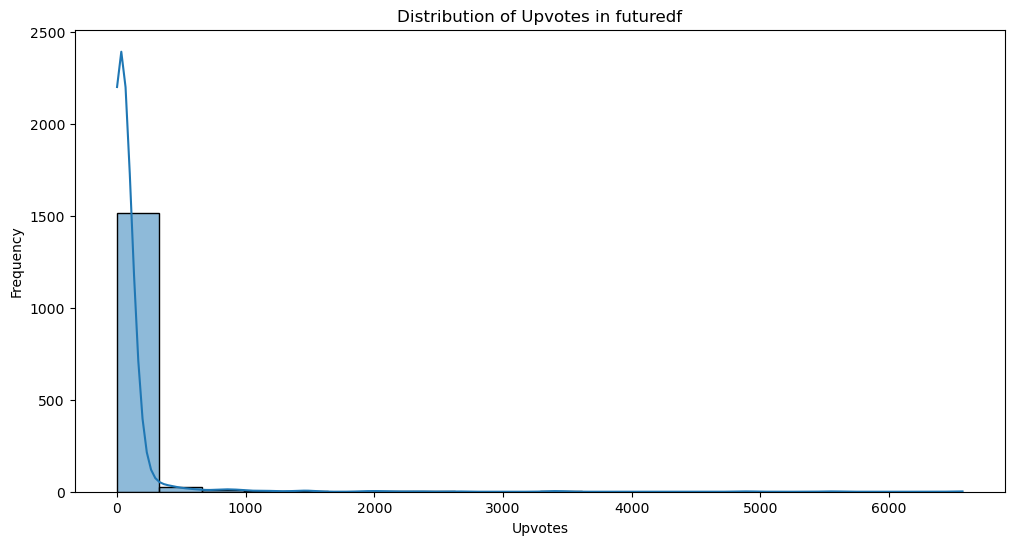

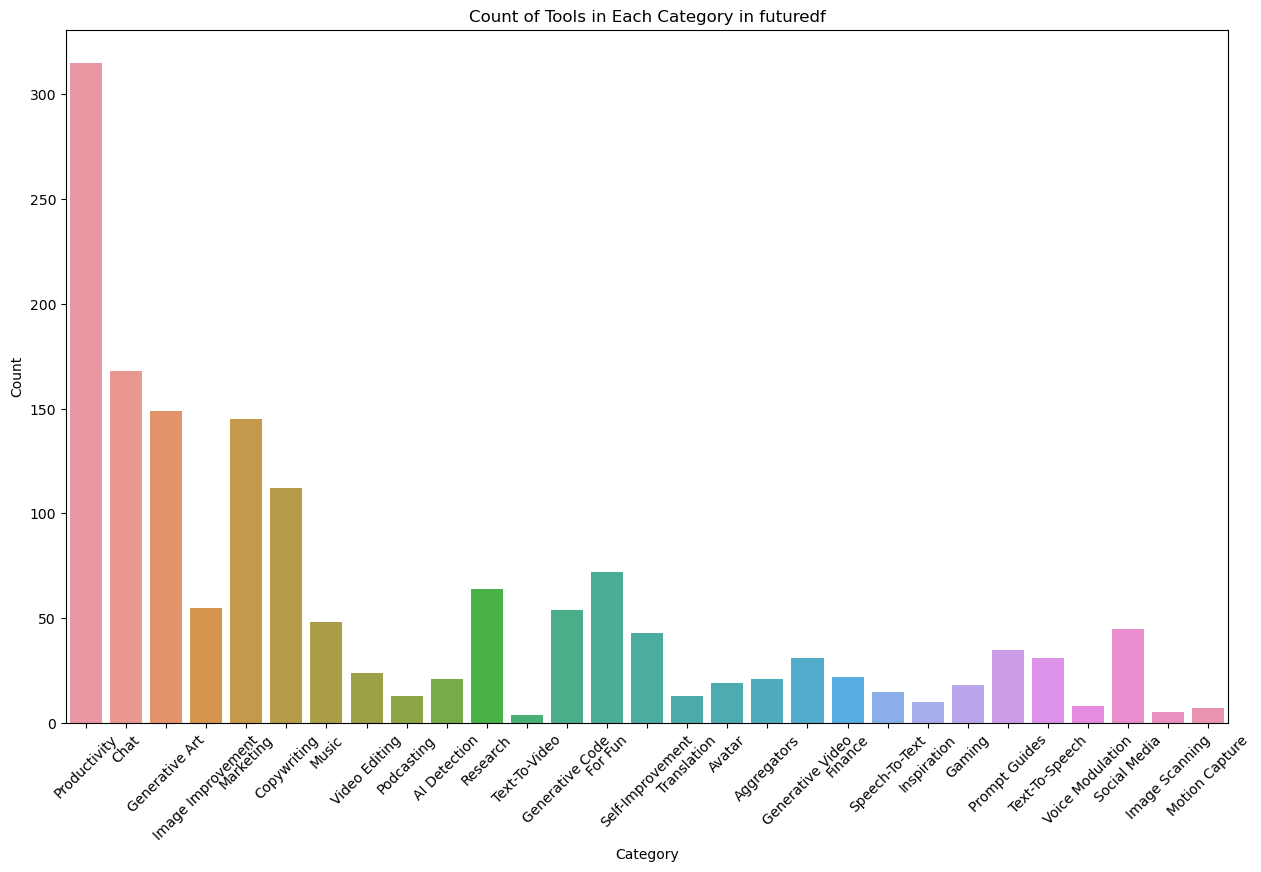

In [45]:


# Histogram of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=futuredf, x='upvotes', bins=20, kde=True)
plt.title('Distribution of Upvotes in futuredf')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()

# Countplot of categories
plt.figure(figsize=(15, 9))
sns.countplot(data=futuredf, x='category')
plt.title('Count of Tools in Each Category in futuredf')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [46]:
smalldf.describe()

,upvotes
count,1011.000000
mean,39.652819
std,119.272370
min,0.000000
25%,9.000000
50%,16.000000
75%,33.000000
max,1987.000000


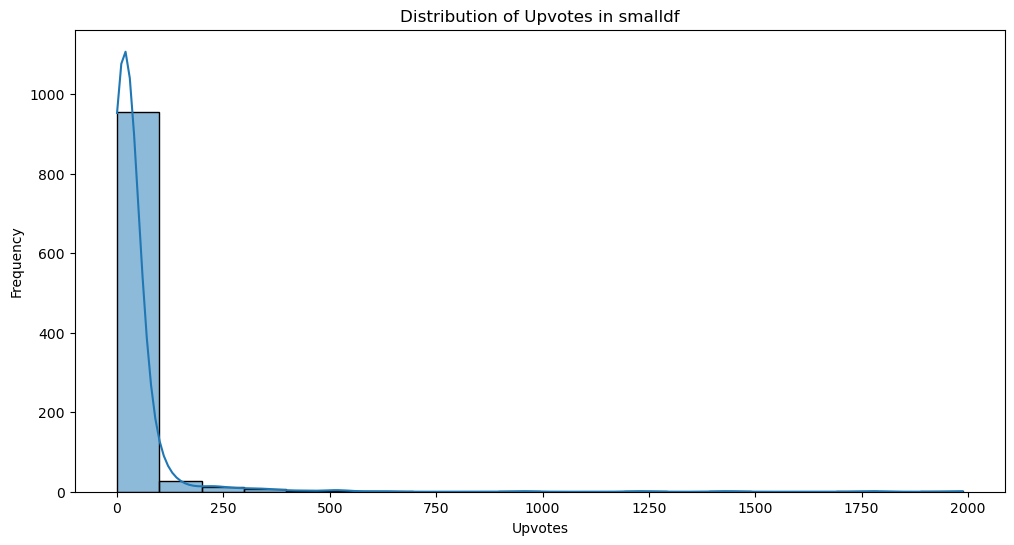

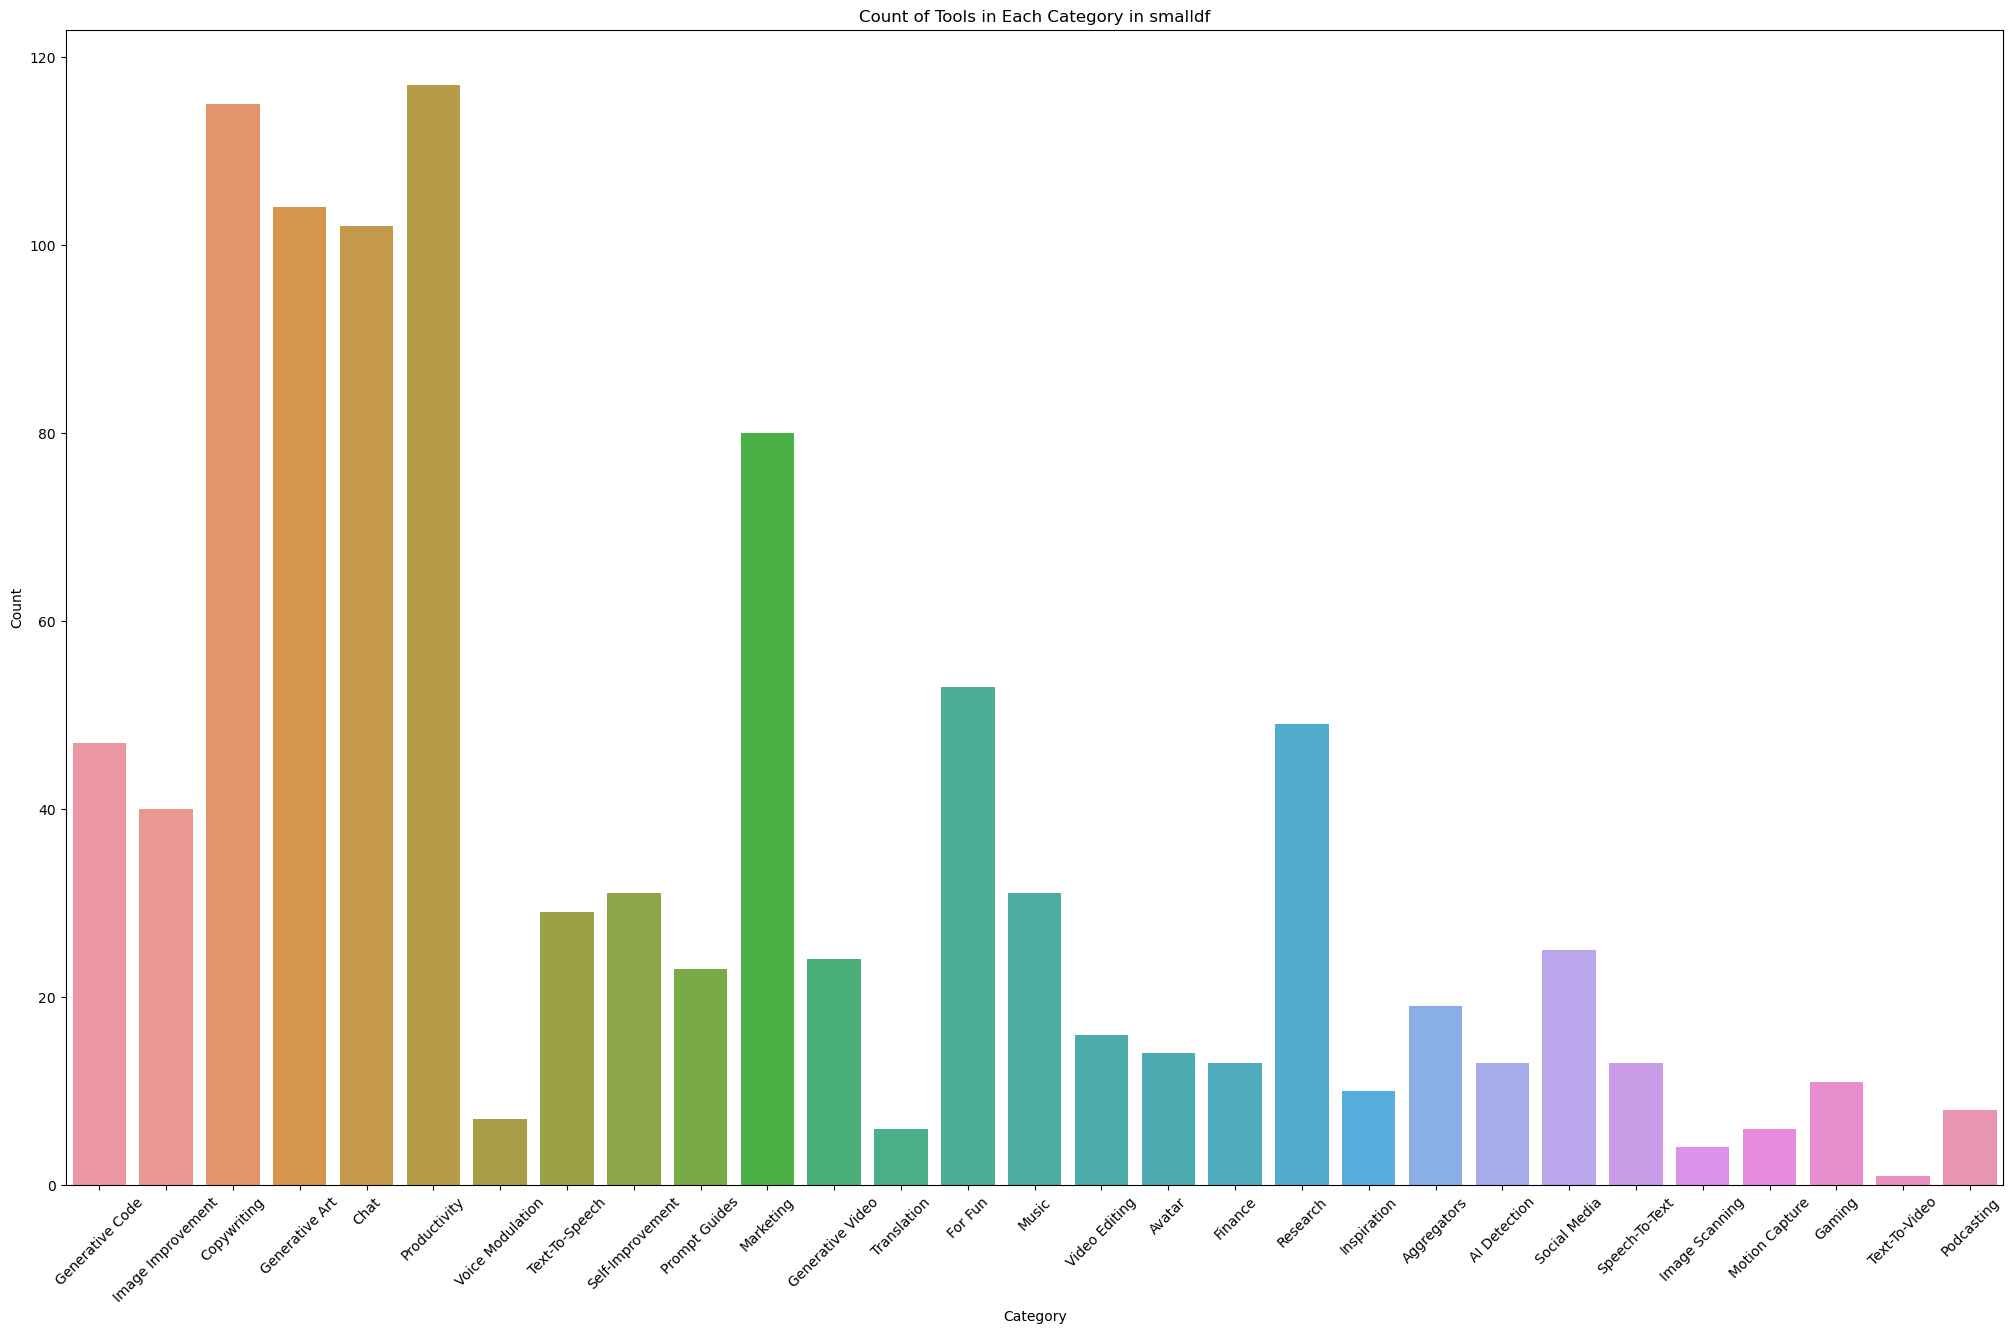

In [47]:


# Histogram of numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(data=smalldf, x='upvotes', bins=20, kde=True)
plt.title('Distribution of Upvotes in smalldf')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()

# Countplot of categories
plt.figure(figsize=(25, 15))
sns.countplot(data=smalldf, x='category')
plt.title('Count of Tools in Each Category in smalldf')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [48]:
# Summary statistics
biggestdf.describe(include='all')

,tool_name,tool_description,free_paid_other,useable_for,price,review,tool_link,category
count,4969,4969,4969,4969,4969,4969,4969,4969
unique,4969,4965,19,526,558,18,4959,8
top,Farm3D,Understand any data instantly using AI,Free,/ productivity,Variable,0,https://www.trymaverick.com/?utm_source=future...,business
freq,1,2,1704,247,2435,3507,2,1202


In [68]:
#top 10 most reviewed on biggestdf 
biggestdf.sort_values(by='review', ascending=False).head(10)

,tool_name,tool_description,free_paid_other,useable_for,price,review,tool_link,category
251,Aiseo,Supercharge your writing skills with AI-genera...,Free Trial,/ copywriting,$ 19/mo,42.0,https://aiseo.ai/?fpr=futurepedia,text
2290,Jusi,AI-powered tool that enables businesses to bri...,Paid,/ developer tools / startup tools / pr...,$99,22.0,https://jusi.me?utm_source=futurepedia&utm_med...,code
3878,Sibyl Ai,"Provide guidance, insights, and support for in...",Free Trial,/ resources / life assistant / educati...,$ 49/mo,15.0,https://sibyls.ai/?utm_source=futurepedia&utm_...,business
3132,Perfectessaywriter.Ai,Generate custom content effortlessly with AI-p...,Freemium,/ general writing,Variable,15.0,https://www.perfectessaywriter.ai/?utm_source=...,text
4313,Textero Ai,Overcome writer's block with AI-powered academ...,Free,/ general writing,Variable,14.0,https://www.textero.ai/?utm_source=futurepedia...,text
2592,Magical,Magical AI - Welcome to the future of calendar...,Freemium,/ summarizer / productivity,$ 15/mo,14.0,https://magical.so/?utm_source=futurepedia&utm...,text
255,Aiter.Io,AI-powered Marketing Agency,Free,/ SEO,Variable,14.0,https://aiter.io/?utm_source=futurepedia&utm_m...,text
1018,Cody,The magic of ChatGPT but trained on your busin...,Freemium,/ human resources,Variable,13.0,https://www.meetcody.ai/?utm_source=futurepedi...,business
1366,Dreamgf,AI-driven virtual girlfriend generator with cu...,Freemium,/ dating / fun tools,$ 9.99/mo,13.0,https://dreamgf.ai/?utm_source=futurepedia&utm...,other
2155,Ingestai,One-stop shop for anyone looking to leverage AI.,Freemium,/ productivity,$ 20/mo,11.0,https://ingestai.io/?utm_source=futurepedia&ut...,business


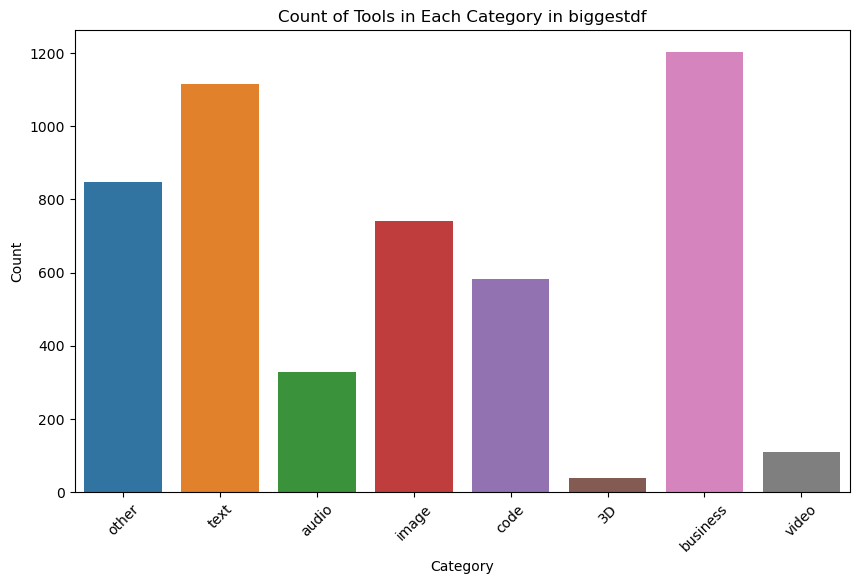

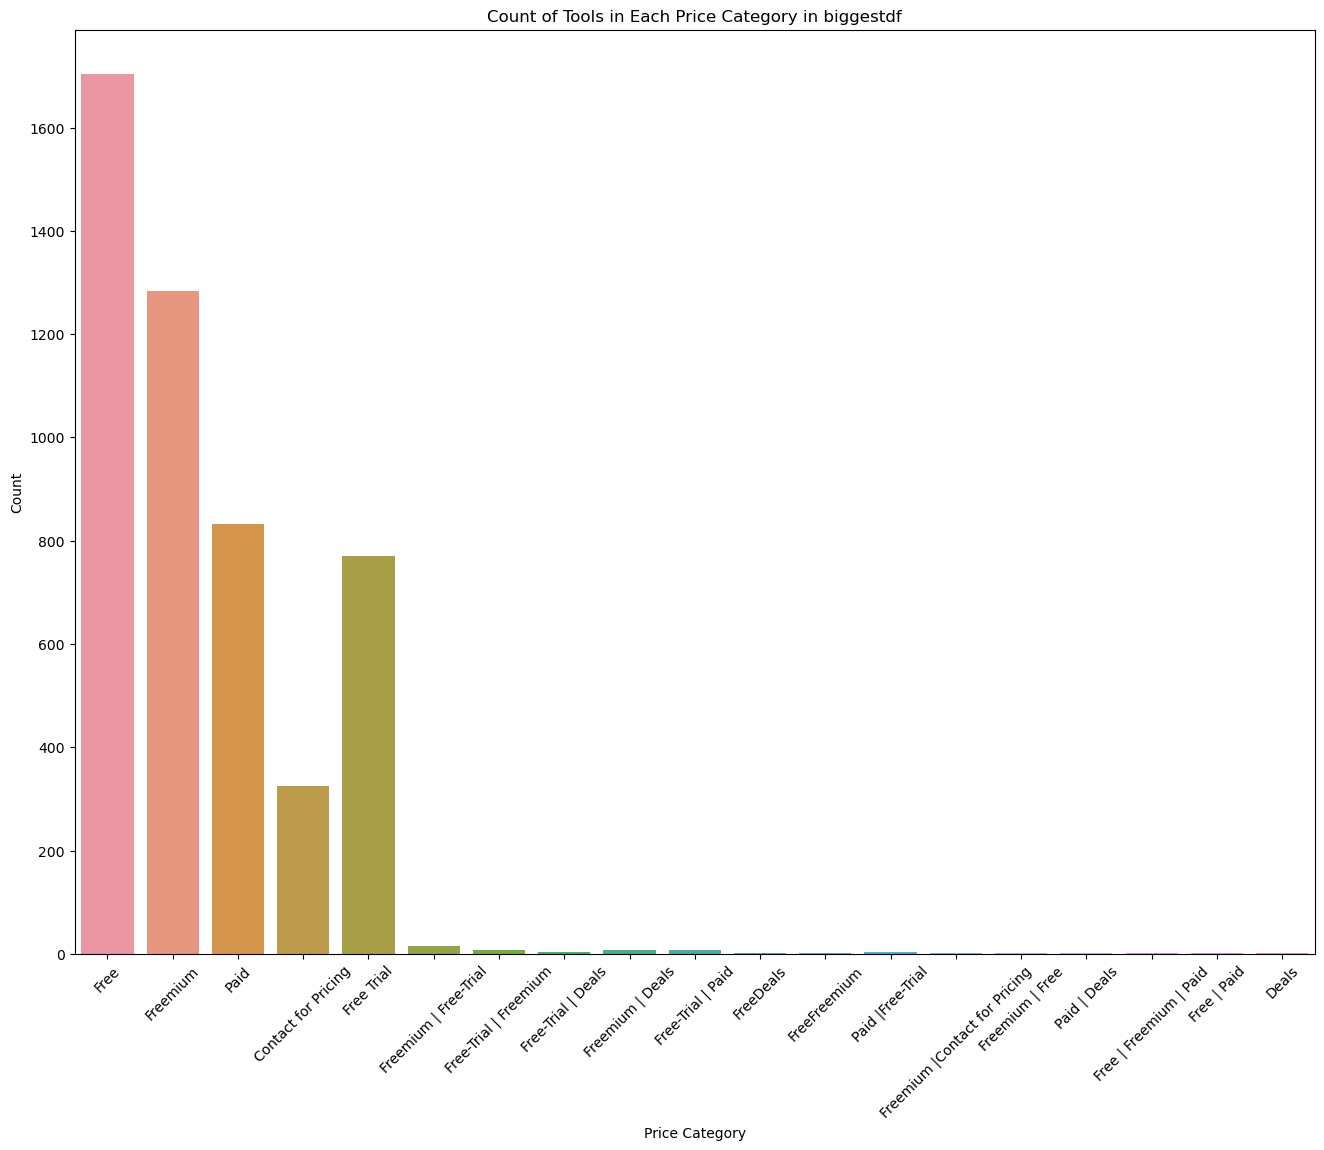

In [49]:


# Countplot of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=biggestdf, x='category')
plt.title('Count of Tools in Each Category in biggestdf')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Countplot of free/paid/other
plt.figure(figsize=(16, 12))
sns.countplot(data=biggestdf, x='free_paid_other')
plt.title('Count of Tools in Each Price Category in biggestdf')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




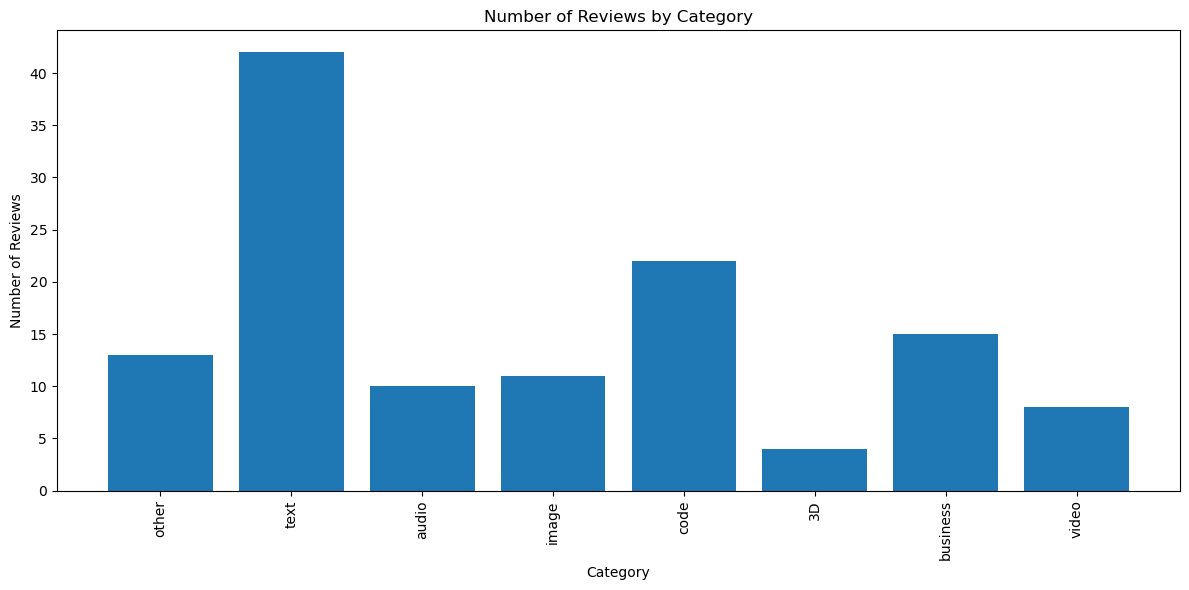

In [67]:


# Number of reviews by category
plt.figure(figsize=(12, 6))
plt.bar(biggestdf['category'], biggestdf['review'])
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [50]:
biggestdf

,tool_name,tool_description,free_paid_other,useable_for,price,review,tool_link,category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,Variable,0,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,0,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,Variable,0,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,Variable,0,https://10web.io/?utm_source=futurepedia&utm_m...,code
...,...,...,...,...,...,...,...,...
4964,Zoom Iq,Capture meaningful and actionable insights fro...,Contact for Pricing,/ summarizer / email assistant,Variable,2,https://blog.zoom.us/zoom-iq-smart-companion/?...,text
4965,Zoomscape Ai,ZoomScape AI is an AI-powered tool that enable...,Free Trial,/ presentations,$5,0,https://zoomscape.ai/?utm_source=futurepedia&u...,business
4966,Zust Qr,Enables users to craft artistic QR codes by in...,Free,/ image generator,Variable,0,https://qr.zust.ai/?utm_source=futurepedia&utm...,image
4967,Zuva,Contract analysis and insight generation.,Free Trial,/ legal assistant,$ 50/mo,1,https://zuva.ai/widget/try-it/?utm_source=futu...,business


In [51]:
smalldf

,tool_mage_url,tool_name,tool_description,category,upvotes
0,https://uploads-ssl.webflow.com/63994dae103371...,Codeium,"Helps developers understand, modify, and test ...",Generative Code,1987
1,https://uploads-ssl.webflow.com/63994dae103371...,LeiaPix,Upload an image and turn it into a 3D animation,Image Improvement,1779
2,https://uploads-ssl.webflow.com/63994dae103371...,GPT-3 Playground (OpenAI),Free AI writing tool - Let the AI generate any...,Copywriting,1433
3,https://uploads-ssl.webflow.com/63994dae103371...,BlueWillow,AI-powered image generating tool in Discord,Generative Art,1230
4,https://uploads-ssl.webflow.com/63994dae103371...,Character.AI,Have chat conversations with AI characters,Chat,954
...,...,...,...,...,...
1007,https://uploads-ssl.webflow.com/63994dae103371...,Shortwave,A platform for emails productivity.,Productivity,1
1008,https://uploads-ssl.webflow.com/63994dae103371...,Adstra,Find and read only the articles that will solv...,Productivity,0
1009,https://uploads-ssl.webflow.com/63994dae103371...,Mental Models,50 mental models to help users better understa...,Self-Improvement,0
1010,https://uploads-ssl.webflow.com/63994dae103371...,AI Listing Architect,Creates SEO-friendly and optimized Amazon list...,Copywriting,0


In [52]:
# Sort smalldf by upvotes in descending order, show top 10
smalldf.sort_values(by='upvotes', ascending=False).head(10)




,tool_mage_url,tool_name,tool_description,category,upvotes
0,https://uploads-ssl.webflow.com/63994dae103371...,Codeium,"Helps developers understand, modify, and test ...",Generative Code,1987
1,https://uploads-ssl.webflow.com/63994dae103371...,LeiaPix,Upload an image and turn it into a 3D animation,Image Improvement,1779
2,https://uploads-ssl.webflow.com/63994dae103371...,GPT-3 Playground (OpenAI),Free AI writing tool - Let the AI generate any...,Copywriting,1433
3,https://uploads-ssl.webflow.com/63994dae103371...,BlueWillow,AI-powered image generating tool in Discord,Generative Art,1230
4,https://uploads-ssl.webflow.com/63994dae103371...,Character.AI,Have chat conversations with AI characters,Chat,954
5,https://uploads-ssl.webflow.com/63994dae103371...,Midjourney,Discord-based AI art tool,Generative Art,615
6,https://uploads-ssl.webflow.com/63994dae103371...,Paraphrasing Tool,AI paraphrasing tool,Productivity,524
7,https://uploads-ssl.webflow.com/63994dae103371...,Voice.ai,Change your voice to famous celebrities in rea...,Voice Modulation,520
8,https://uploads-ssl.webflow.com/63994dae103371...,Maze,Discord-based generative art platform,Generative Art,507
9,https://uploads-ssl.webflow.com/63994dae103371...,to teach,For teachers to create exercises and lessons f...,Productivity,446


In [53]:
# Sort smalldf by upvotes in descending order, show bottom 10
smalldf.sort_values(by='upvotes', ascending=False).tail(10)


,tool_mage_url,tool_name,tool_description,category,upvotes
996,https://uploads-ssl.webflow.com/63994dae103371...,SnapGPT,An app to ocr text recognition from images.,Productivity,1
1001,https://uploads-ssl.webflow.com/63994dae103371...,Audyo,A tool to convert text to speech.,Text-To-Speech,1
1000,https://uploads-ssl.webflow.com/63994dae103371...,HeyMind,An app to chat with historical figures.,Self-Improvement,1
999,https://uploads-ssl.webflow.com/63994dae103371...,Send GPT via Email,A Google Chrome Extension to send ChatGPT conv...,Productivity,1
998,https://uploads-ssl.webflow.com/63994dae103371...,Inkdrop,A tool to make video meetings collaborative.,Productivity,1
997,https://uploads-ssl.webflow.com/63994dae103371...,Mixture Of Diffusers,"A tool for creating, sharing, and linking mode...",Generative Art,1
1008,https://uploads-ssl.webflow.com/63994dae103371...,Adstra,Find and read only the articles that will solv...,Productivity,0
1009,https://uploads-ssl.webflow.com/63994dae103371...,Mental Models,50 mental models to help users better understa...,Self-Improvement,0
1010,https://uploads-ssl.webflow.com/63994dae103371...,AI Listing Architect,Creates SEO-friendly and optimized Amazon list...,Copywriting,0
1011,https://uploads-ssl.webflow.com/63994dae103371...,Replika,Create your own AI character and have chat con...,For Fun,0


In [54]:
# Sort futuredf by upvotes in descending order, show top 10
futuredf.sort_values(by='upvotes', ascending=False).head(10)

,tool_mage_url,tool_name,tool_description,category,upvotes
75,https://global-uploads.webflow.com/63994dae103...,Copymate,A tool for SEO content generator in any langua...,Copywriting,6570
1240,https://global-uploads.webflow.com/63994dae103...,Codeium,"Helps developers understand, modify, and test ...",Generative Code,5558
1183,https://global-uploads.webflow.com/63994dae103...,LeiaPix,Upload an image and turn it into a 3D animation,Image Improvement,4893
48,https://global-uploads.webflow.com/63994dae103...,Midjourney for Slack,A slack bot to generate Midjourney images.,Generative Art,3434
1115,https://global-uploads.webflow.com/63994dae103...,Kaiber,"Video generation engine, using your own images...",Generative Video,3386
186,https://global-uploads.webflow.com/63994dae103...,Any Summary,"A tool to summarize long documents, images and...",Productivity,2618
1499,https://global-uploads.webflow.com/63994dae103...,Character.AI,Have chat conversations with AI characters,Chat,2327
1510,https://global-uploads.webflow.com/63994dae103...,GPT-3 Playground (OpenAI),Free AI writing tool - Let the AI generate any...,Copywriting,2107
170,https://global-uploads.webflow.com/63994dae103...,Revocalize AI,A tool to convert audio into vocal tracks and ...,Music,1999
1187,https://global-uploads.webflow.com/63994dae103...,BlueWillow,AI-powered image generating tool in Discord,Generative Art,1933


In [55]:
# Sort futuredf by upvotes in descending order, show bottom 10
futuredf.sort_values(by='upvotes', ascending=False).tail(10)

,tool_mage_url,tool_name,tool_description,category,upvotes
62,https://global-uploads.webflow.com/63994dae103...,PluginLab,A tool for ChatGPT plugin creators to authenti...,Productivity,3
2,https://global-uploads.webflow.com/63994dae103...,Bito,A tool to generate custom designs for any proj...,Generative Art,3
1472,https://global-uploads.webflow.com/63994dae103...,Elephas,AI writing assistant for Apple products,Copywriting,3
113,https://global-uploads.webflow.com/63994dae103...,Gnbly,An ai assistant to help with communication and...,Productivity,3
896,https://global-uploads.webflow.com/63994dae103...,Phind,AI search engine for developers,Research,2
423,https://global-uploads.webflow.com/63994dae103...,Collato,A search engine for product teams.,Productivity,2
3,https://global-uploads.webflow.com/63994dae103...,Bagasura,"A platform for bug tracking, streamlining work...",Productivity,2
45,https://global-uploads.webflow.com/63994dae103...,Formulas HQ,A tool to generate formulas for various applic...,Generative Code,2
105,https://global-uploads.webflow.com/63994dae103...,Leexi,A platform for sales teams and automate note t...,Productivity,2
0,https://global-uploads.webflow.com/63994dae103...,Inbox Narrator,An app for email summaries delivered by a voic...,Productivity,1


# Insigths/ conclusions from the different datasets: 

biggestdf: 

    -4968 tools
    
    -small range of categories (8) compared with  the other datasets.
    
    - business and text most popular categories , 3d and video less popular categories. (assuming number of reviews are directly related with popularity(in this dataset we don't have upvotes, so i am using reviews as the metric to calculate popularity)
    
    - (assuming reviews as synonym of popularity again, people tend to prefer Free/ freemium tools, since 9 out of the top 10 most reviewed feautures are free/freemium, only one is paid.
    
    -top 5 most reviewed are : Aiseo, Jusi , Sibyl AI, Perfectessaywriter.AI, Textero AI .
    
    -text and code are the categories where people tend to leave more reviews.
    
    - most tools are free or freemium ( 3000+ wich means 60% of our sample)

smalldf: 

    - 1011 tools
    
    - big range of categories: 29 different categories)
    
    - mean number of votes is 39, ranging between 0 and 1987 upvotes 
    
    - most popular category are productivity, copywritting and generative art, less popular is text to video, image scranning and translation. (according to upvotes)         
    
    - Codeium, LeiaPix and GPT-3 PLayground  and Blue WIllow are most popular tools , while Adstra Mental MOdels, AI Listing Architect and Replika being less popular ( only ones with 0 upvotes)                                                           

futuredf: 

    - 1569 tools ( 548 new soon to come tools added, to the 1011 tools already on the dataset).
    
    - mean number of upvotes 82 ranging between 1 and 6570 (interesting to see the number of mean votes is approx 2.1x the mean upvotes on the smalldf and that there is a new tool to com with 3.5x+ upvotes than the most popular one.
    
    - i will assume also from the values below that AI tools are gaining popularity and new users.
    
    -most popular categories are:productivity chat and generative art ( we can spot an uptrend on chatbots and a downtrend on copywritting) and less popular are:  text to video image scanning translation (same as before).
    
    -most popular tools are: copymate, codeium LeiaPix Midjourney for Slack  less popular tools  Inbox Narrator Leexi Formulas HQ Bagasura (this info gives us some additional info:
    
    - copymate is the next best thing(ai tool) with impressive 6570 upvotes, another interesting insight is that from bottom 10 ai tools , 6 are categorized as productivity.
                                                                                                                                            
                                                                                                                                              
                                                                                                                                                   
                                                                                                                                               
    

# Tool recommender creation for smalldf

In [56]:
import pandas as pd
from IPython.display import display, HTML

# Assuming 'smalldf' is your DataFrame
available_categories = smalldf['category'].unique()
category_list = ", ".join(available_categories)

print("Available categories:")
print(category_list)

selected_category = input("Enter the category you're interested in: ")

# Filter 'smalldf' based on the selected category
filtered_df = smalldf[smalldf['category'] == selected_category]

if not filtered_df.empty:
    # Sort filtered_df by upvotes in descending order to get the most upvoted tools
    recommended_tools = filtered_df.sort_values(by='upvotes', ascending=False)

    # Create an HTML string to display the tool names, descriptions, upvotes, and images
    html_str = ""
    for index, row in recommended_tools.iterrows():
        tool_name = row['tool_name']
        tool_description = row['tool_description']
        upvotes = row['upvotes']
        tool_image_url = row['tool_mage_url']
        # Add the tool information and image to the HTML string
        html_str += f"<p><strong>{tool_name}</strong> - {tool_description}<br>Upvotes: {upvotes}</p>"
        html_str += f'<img src="{tool_image_url}" alt="{tool_name}" style="max-width:300px;"/><br><br>'

    # Display the HTML string
    display(HTML(html_str))
else:
    print(f"No tools found in the '{selected_category}' category.")


Available categories:
Generative Code, Image Improvement, Copywriting, Generative Art, Chat, Productivity, Voice Modulation, Text-To-Speech, Self-Improvement, Prompt Guides, Marketing, Generative Video, Translation, For Fun, Music, Video Editing, Avatar, Finance, Research, Inspiration, Aggregators, AI Detection, Social Media, Speech-To-Text, Image Scanning, Motion Capture, Gaming, Text-To-Video, Podcasting


Enter the category you're interested in:  Podcasting


# Tool recommender creation for futuredf

In [57]:
import pandas as pd
from IPython.display import display, HTML

# Assuming 'futuredf' is your DataFrame
available_categories = futuredf['category'].unique()
category_list = ", ".join(available_categories)

print("Available categories:")
print(category_list)

selected_category = input("Enter the category you're interested in: ")

# Filter 'futuredf' based on the selected category
filtered_df = futuredf[futuredf['category'] == selected_category]

if not filtered_df.empty:
    # Sort filtered_df by upvotes in descending order to get the most upvoted tools
    recommended_tools = filtered_df.sort_values(by='upvotes', ascending=False)

    # Create an HTML string to display the tool names, descriptions, upvotes, and images
    html_str = ""
    for index, row in recommended_tools.iterrows():
        tool_name = row['tool_name']
        tool_description = row['tool_description']
        upvotes = row['upvotes']
        tool_image_url = row['tool_mage_url']
        # Add the tool information and image to the HTML string
        html_str += f"<p><strong>{tool_name}</strong> - {tool_description}<br>Upvotes: {upvotes}</p>"
        html_str += f'<img src="{tool_image_url}" alt="{tool_name}" style="max-width:300px;"/><br><br>'

    # Display the HTML string
    display(HTML(html_str))
else:
    print(f"No tools found in the '{selected_category}' category.")


Available categories:
Productivity, Chat, Generative Art, Image Improvement, Marketing, Copywriting, Music, Video Editing, Podcasting, AI Detection, Research, Text-To-Video, Generative Code, For Fun, Self-Improvement, Translation, Avatar, Aggregators, Generative Video, Finance, Speech-To-Text, Inspiration, Gaming, Prompt Guides, Text-To-Speech, Voice Modulation, Social Media, Image Scanning, Motion Capture


Enter the category you're interested in:  Motion Capture


In [58]:
# Now i will export dfs to .csv so i can build the recommenders in a separate .ipynb file.

# Export smalldf to CSV
smalldf.to_csv('smalldf.csv', index=False)

# Export futuredf to CSV
futuredf.to_csv('futuredf.csv', index=False)

biggestdf.to_csv('biggestdf.csv', index=False)


In [ ]:
biggestdf.to_csv('biggestdf.csv', index=False)